In [1]:
import networkx as nx
from tqdm import tqdm
import numpy as np
import random 
import matplotlib.pyplot as plt

# 设置全局字体为 Times New Roman
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams.update({"font.size": 16})

# 启用 LaTeX 渲染
plt.rcParams["text.usetex"] = True
save = False

# Number of vertexes
n = 256

# @Rui graph-1 for finding 16-subgraph with max-hafnian: containing 16-complete graph and remaining edge with probability 0.2
G1 = nx.Graph()
np.random.seed(7)

# Select 16 nodes to form a complete subgraph
nodes_to_connect = list(range(n))
np.random.shuffle(nodes_to_connect)
complete_subgraph_nodes = nodes_to_connect[:16]
G1.add_nodes_from(range(n)) 
G1.add_edges_from(nx.complete_graph(complete_subgraph_nodes).edges())
# Randomly select the remaining edges with probability 0.2
for i in range(n):
    for j in range(i+1, n):
        if (i in complete_subgraph_nodes and j in complete_subgraph_nodes) or np.random.rand() >= 0.2:
            continue
        G1.add_edge(i, j)
np.save(f"./temp/G1.npy", nx.to_numpy_array(G1))

# @Rui G2 for 80-densest subgraph: vertex i has edges to vertices 0, 1, …, n-1-i
adj_matrix = np.zeros((n, n), dtype=int)
for i in range(n):
    adj_matrix[i, :n-i] = 1
    adj_matrix[i, i] = 0
# Make sure the matrix is symmetric since it's an undirected graph
adj_matrix = np.triu(adj_matrix) + np.triu(adj_matrix, 1).T
G2 = nx.from_numpy_array(adj_matrix)
np.save(f"./temp/G2.npy", nx.to_numpy_array(G2))

from Glauber_density import *

100%|██████████| 10/10 [4:45:34<00:00, 1713.43s/it] 


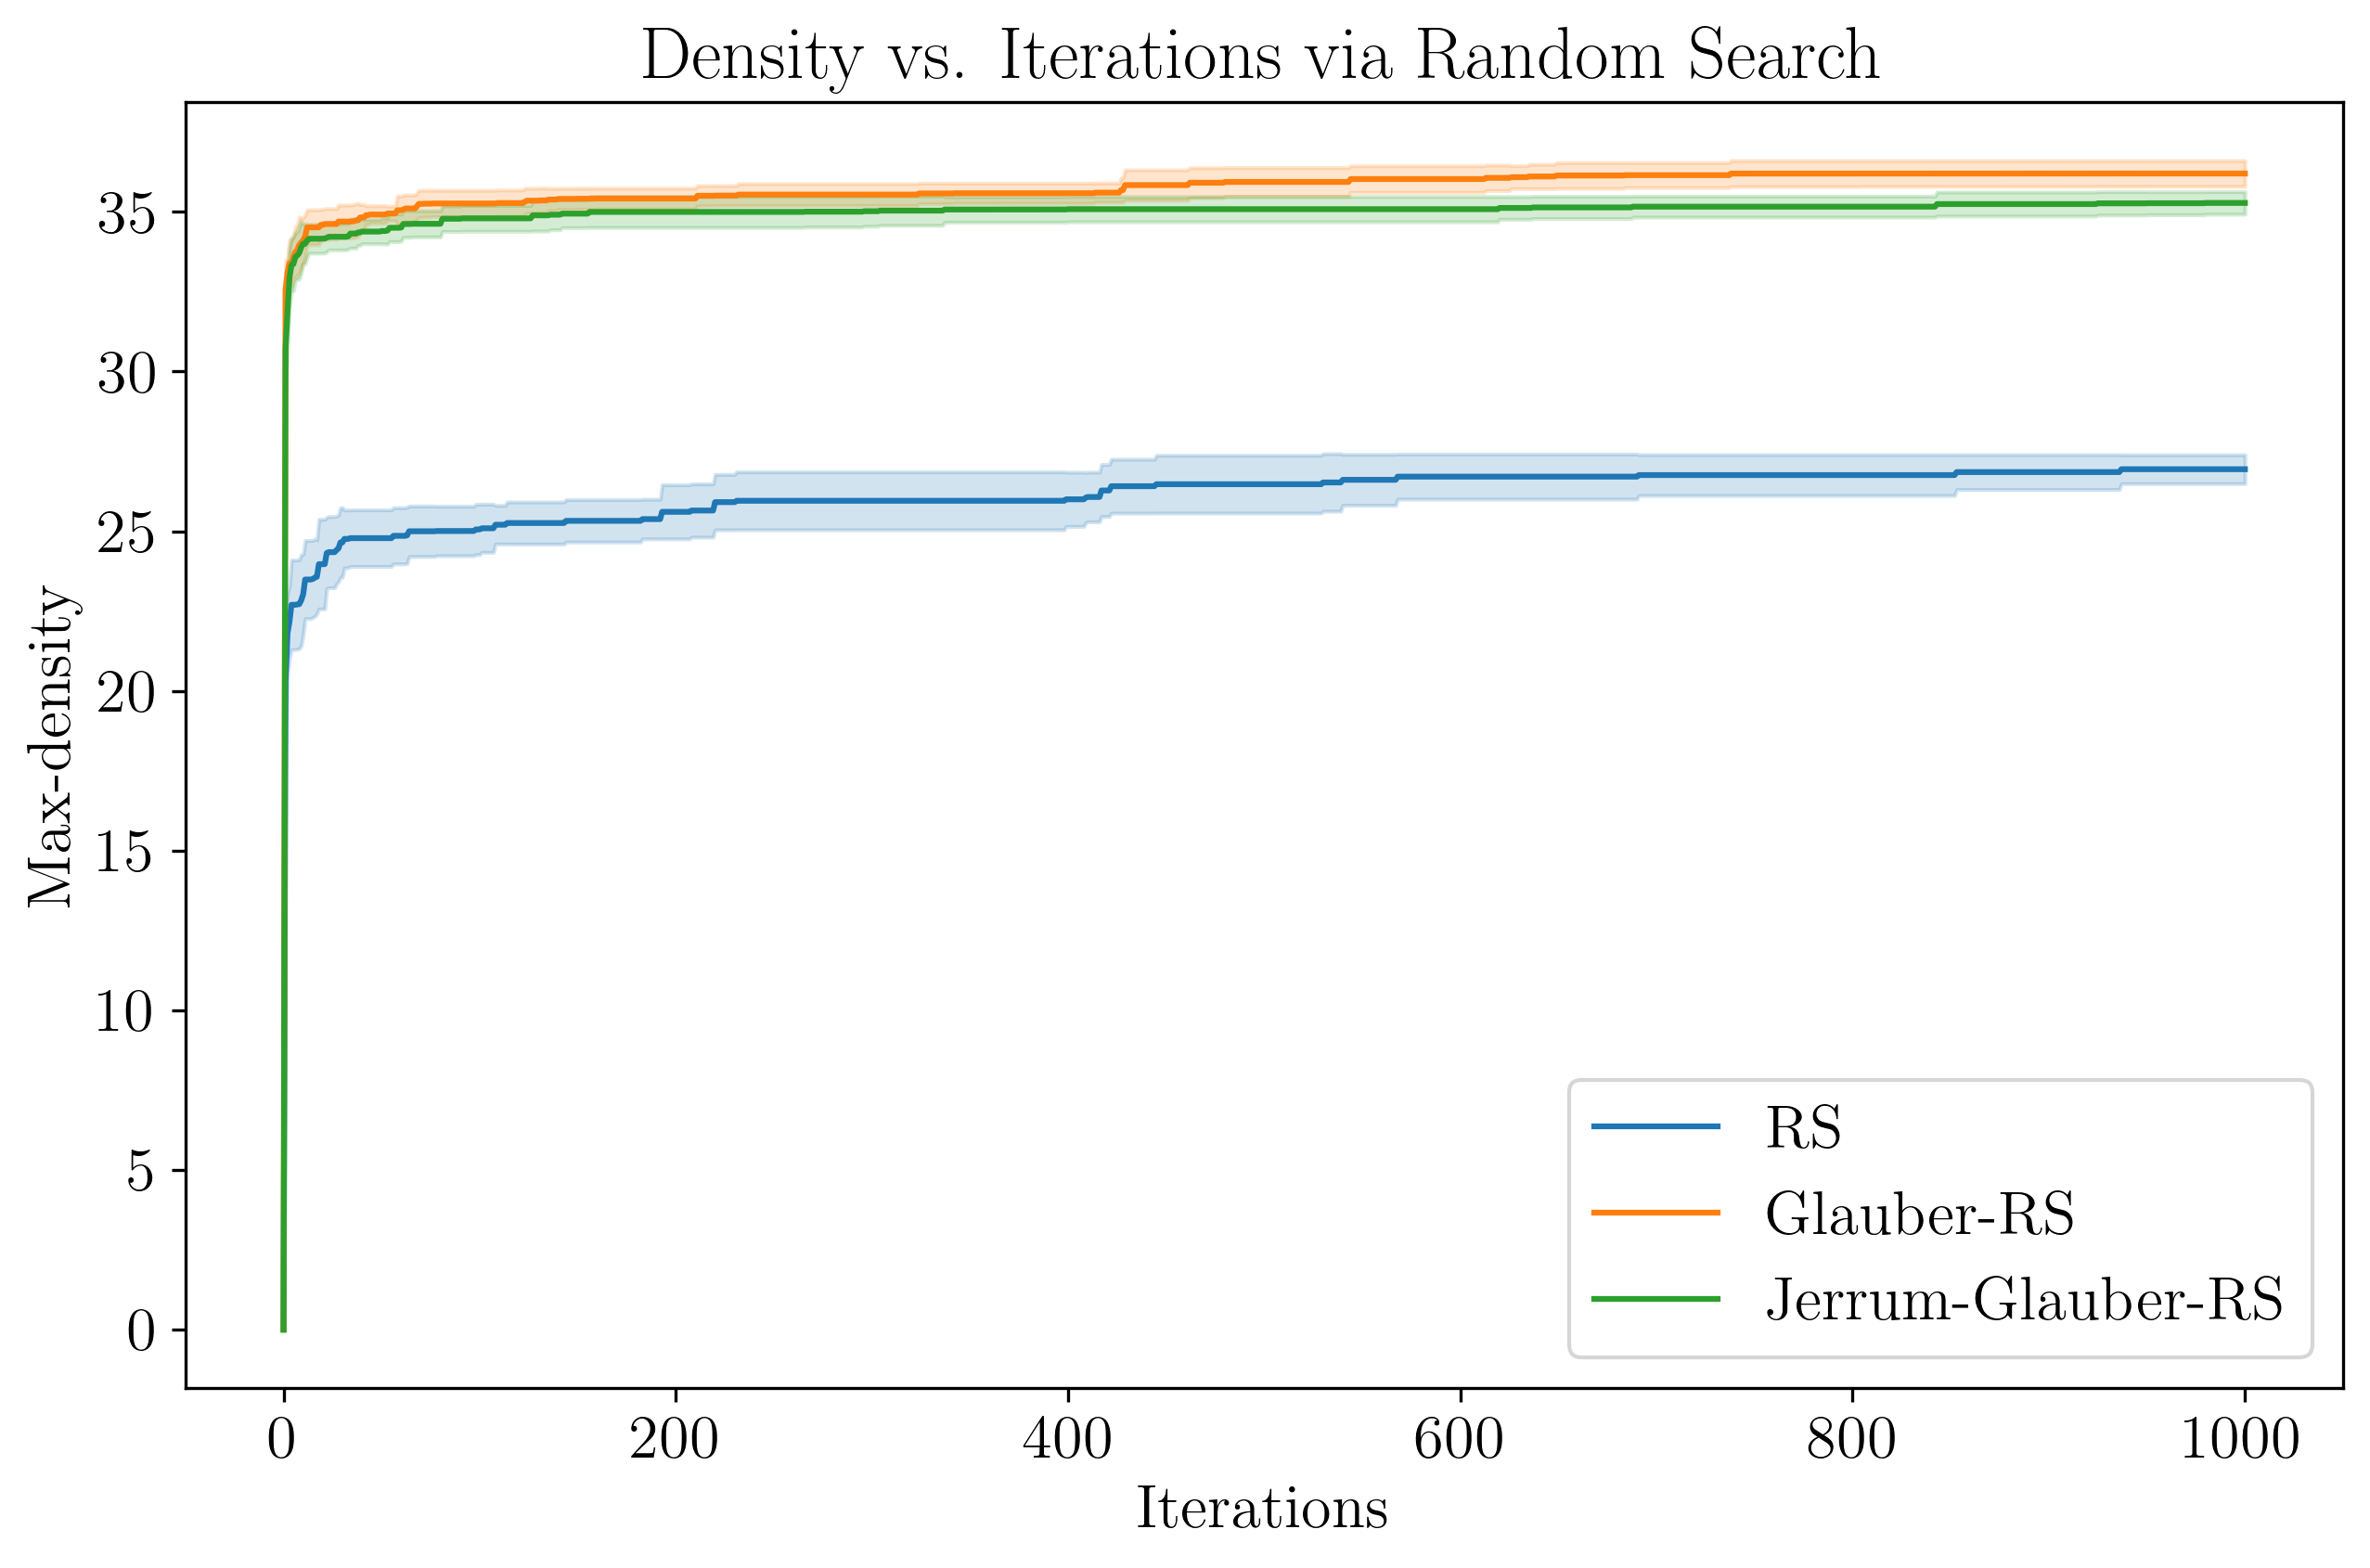

In [3]:
# Plot the density of the 80-node subgraph with the maximum density using Random Search
G = G2
c = 0.4 # fugacity
k = 80
iteration = 1000
mixing_time = 1000
plt.figure(figsize=(10, 6), dpi=300)

# Finding the 80-node subgraph with the maximum density using Random Search
max_density_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    max_density_list[i], best_subgraph, best_density = random_search(G, k, iteration)

np.save(f"./temp/RS_density_list.npy", max_density_list)
mean_density_values = np.mean(max_density_list, axis=0)
std_density_values = np.std(max_density_list, axis=0)

plt.plot(mean_density_values, label="RS", color='C0')
plt.fill_between(range(iteration+1), mean_density_values - std_density_values, mean_density_values + std_density_values, color = 'C0', alpha=0.2)

# Finding the 80-node subgraph with the maximum density using Glauber Random Search
glauber_max_density_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    glauber_max_density_list[i], glauber_best_subgraph, glauber_best_density = glauber_random_search(G, k, c, iteration, mixing_time)

np.save(f"./temp/glauber_RS_density_list.npy", glauber_max_density_list)
mean_glauber_density_values = np.mean(glauber_max_density_list, axis=0)
std_glauber_density_values = np.std(glauber_max_density_list, axis=0)

plt.plot(mean_glauber_density_values, label="Glauber-RS", color='C1')
plt.fill_between(range(iteration+1), mean_glauber_density_values - std_glauber_density_values, mean_glauber_density_values + std_glauber_density_values, color = 'C1', alpha=0.2)

# Finding the 80-node subgraph with the maximum density using Jerrum Glauber Random Search
jerrum_glauber_max_density_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    jerrum_glauber_max_density_list[i], jerrum_glauber_best_subgraph, jerrum_glauber_best_density = jerrum_glauber_random_search(G, k, c, iteration, mixing_time)

np.save(f"./temp/jerrum_glauber_RS_density_list.npy", jerrum_glauber_max_density_list)
mean_jerrum_glauber_density_values = np.mean(jerrum_glauber_max_density_list, axis=0)
std_jerrum_glauber_density_values = np.std(jerrum_glauber_max_density_list, axis=0)

plt.plot(mean_jerrum_glauber_density_values, label="Jerrum-Glauber-RS", color='C2')
plt.fill_between(range(iteration+1), mean_jerrum_glauber_density_values - std_jerrum_glauber_density_values, mean_jerrum_glauber_density_values + std_jerrum_glauber_density_values, color = 'C2', alpha=0.2)


plt.xlabel("Iterations")
plt.ylabel("Max-density")
plt.title("Density vs. Iterations via Random Search")
plt.legend(loc = "best")
plt.savefig("./Archive/Figure/density_random_search.pdf")
plt.show()

In [ ]:
subgraph1 = glauber_dynamics(G2, k, c, mixing_time=1000)
len(list(subgraph1.nodes()))

80

100%|██████████| 10/10 [4:50:58<00:00, 1745.81s/it] 


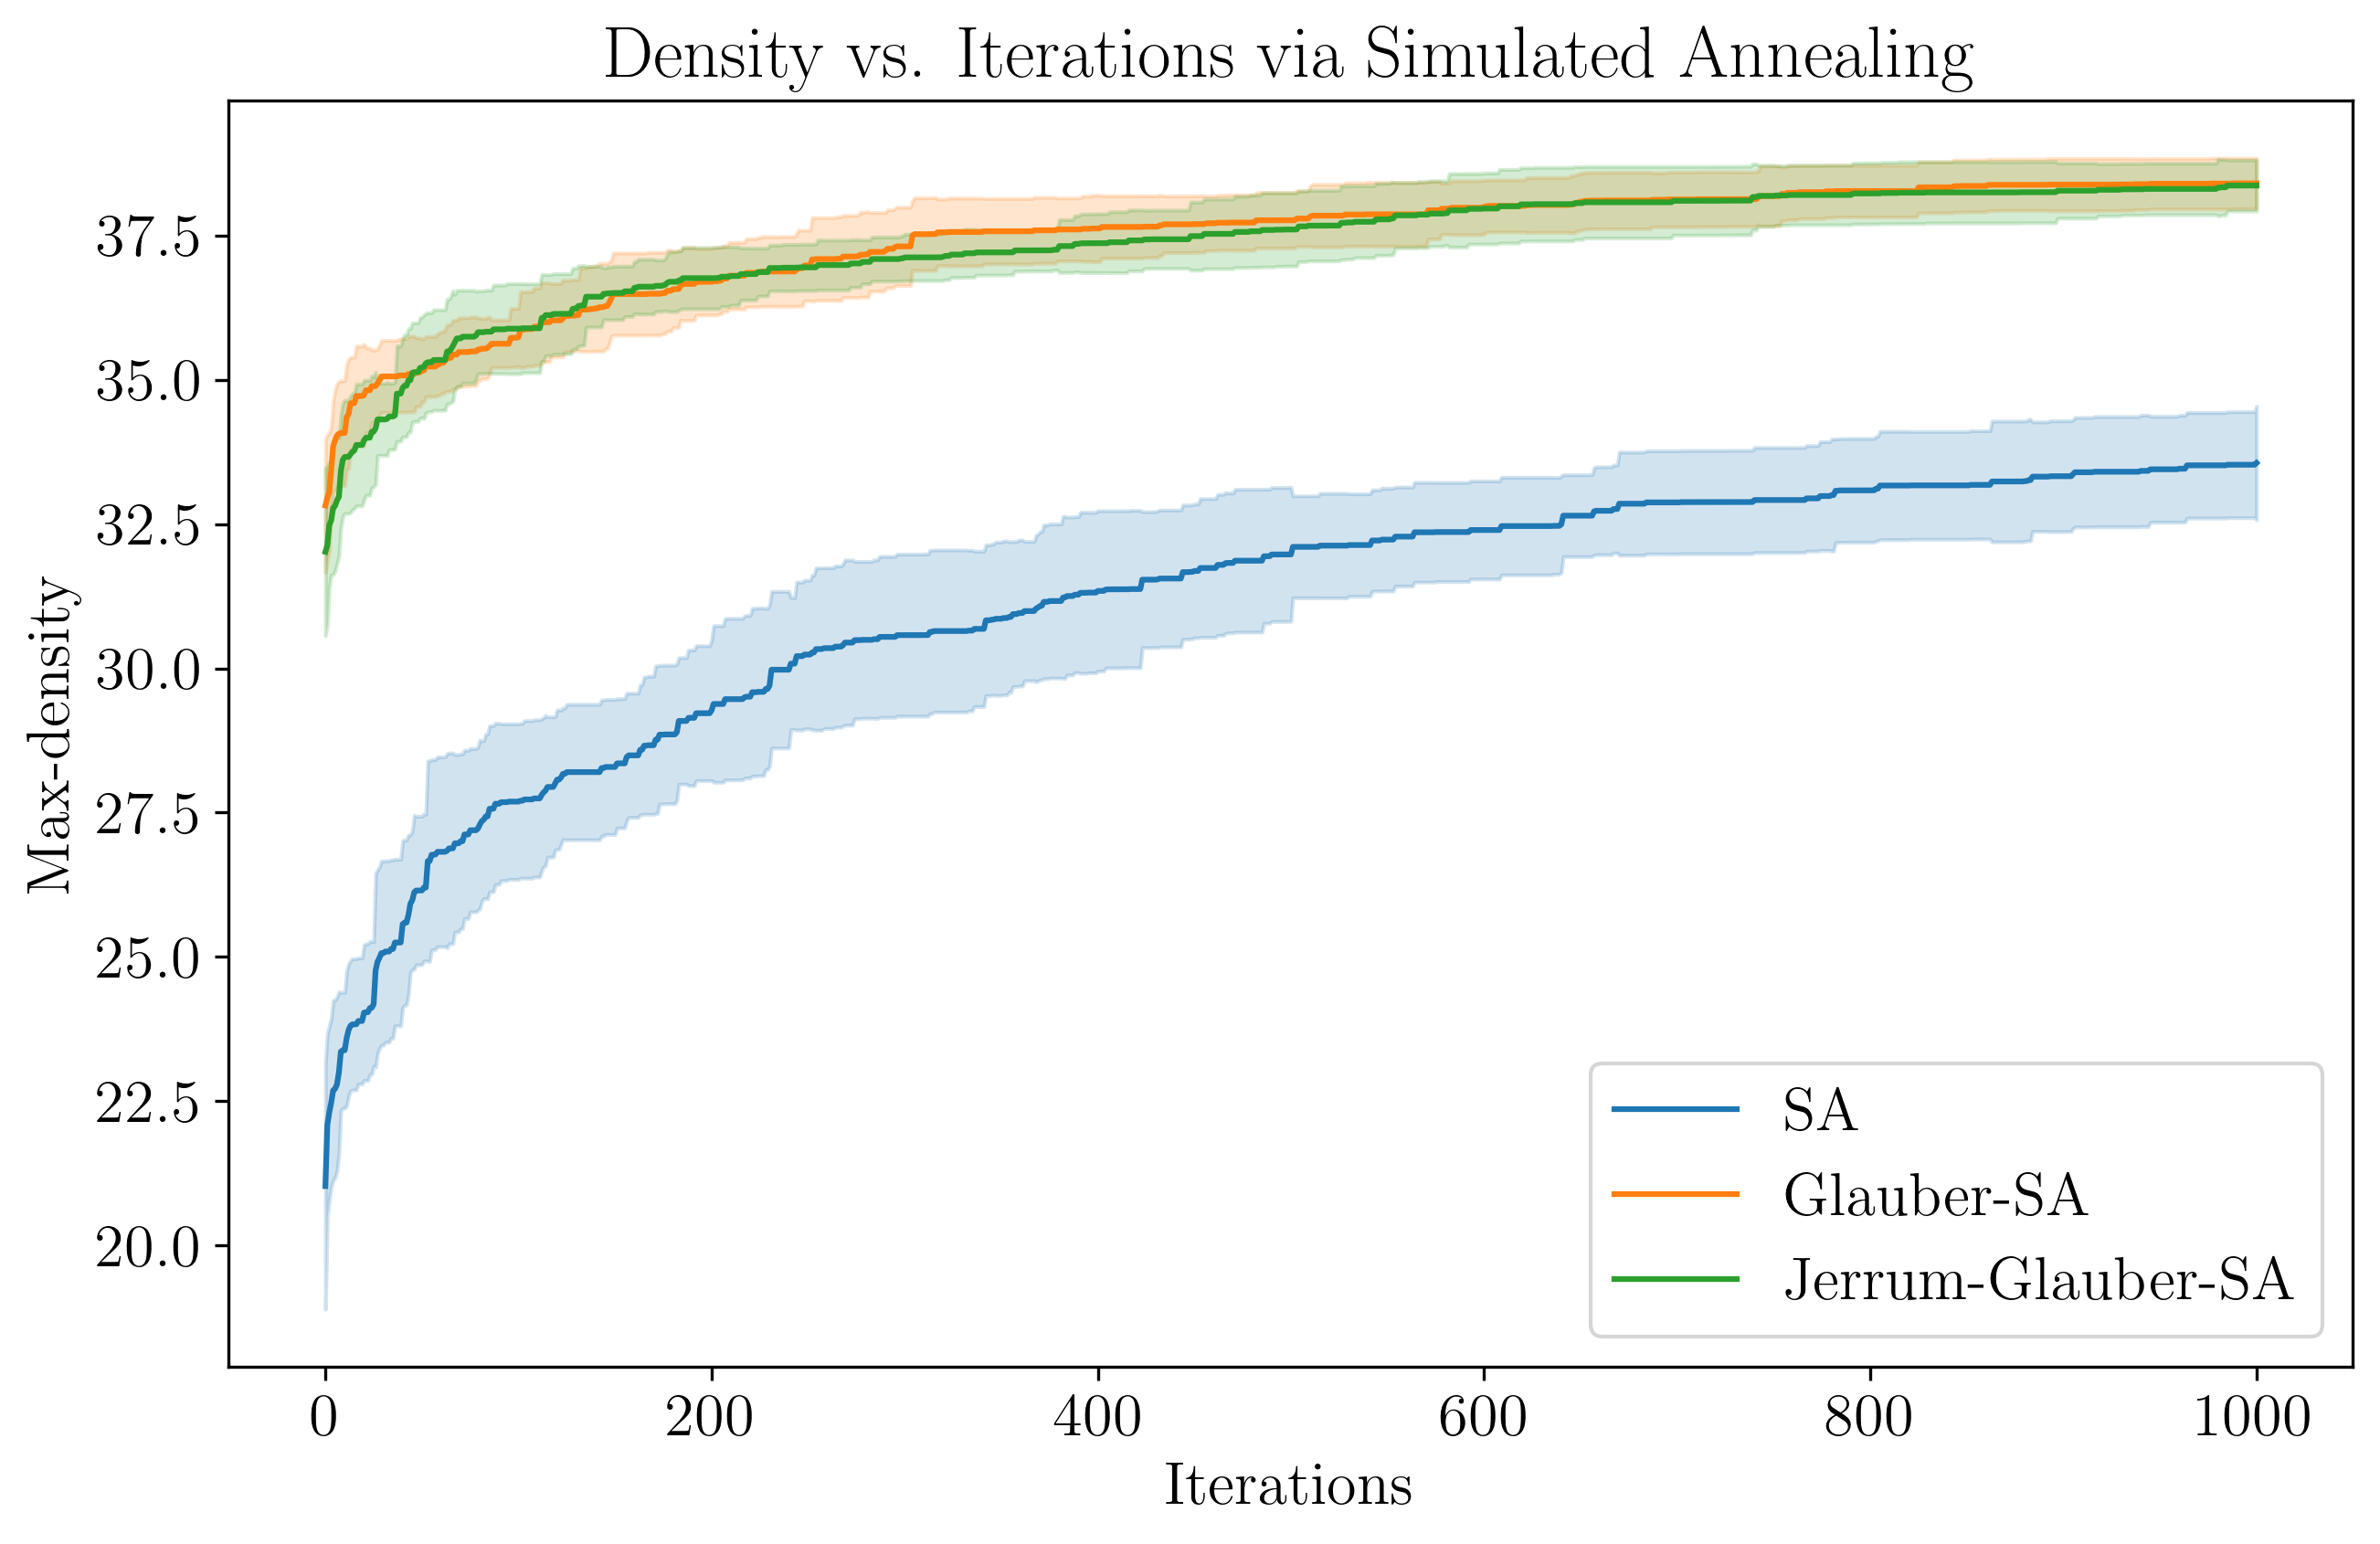

In [3]:
# Plot the density of the 80-node subgraph with the maximum density using Simulated Annealing
G = G2
c = 0.4 # fugacity
k = 80
iteration = 1000
mixing_time = 1000
t_initial = 1.0
plt.figure(figsize=(10, 6), dpi=300)

# Finding the 80-node subgraph with the maximum density using Simulated Annealing
max_density_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    max_density_list[i], best_subgraph, best_density = simulated_annealing(G, k, iteration, t_initial)
    
np.save(f"./temp/SA_density_list.npy", max_density_list)
mean_density_values = np.mean(max_density_list, axis=0)
std_density_values = np.std(max_density_list, axis=0)

plt.plot(mean_density_values, label="SA", color='C0')
plt.fill_between(range(iteration+1), mean_density_values - std_density_values, mean_density_values + std_density_values, color='C0', alpha=0.2)

# Finding the 80-node subgraph with the maximum density using Glauber Simulated Annealing
glauber_max_density_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    glauber_max_density_list[i], glauber_best_subgraph, glauber_best_density = glauber_simulated_annealing(G, k, c, iteration, mixing_time, t_initial)

np.save(f"./temp/glauber_SA_density_list.npy", glauber_max_density_list)
mean_glauber_density_values = np.mean(glauber_max_density_list, axis=0)
std_glauber_density_values = np.std(glauber_max_density_list, axis=0)

plt.plot(mean_glauber_density_values, label="Glauber-SA", color='C1')
plt.fill_between(range(iteration+1), mean_glauber_density_values - std_glauber_density_values, mean_glauber_density_values + std_glauber_density_values, color = 'C1', alpha=0.2)

# Finding the 80-node subgraph with the maximum density using Jerrum Glauber Simulated Annealing
jerrum_glauber_max_density_list = np.zeros((10, iteration+1))
for i in tqdm(range(10)):
    jerrum_glauber_max_density_list[i], jerrum_glauber_best_subgraph, jerrum_glauber_best_density = jerrum_glauber_simulated_annealing(G, k, c, iteration, mixing_time, t_initial)

np.save(f"./temp/jerrum_glauber_SA_density_list.npy", jerrum_glauber_max_density_list)
mean_jerrum_glauber_density_values = np.mean(jerrum_glauber_max_density_list, axis=0)
std_jerrum_glauber_density_values = np.std(jerrum_glauber_max_density_list, axis=0)

plt.plot(mean_jerrum_glauber_density_values, label="Jerrum-Glauber-SA", color='C2')
plt.fill_between(range(iteration+1), mean_jerrum_glauber_density_values - std_jerrum_glauber_density_values, mean_jerrum_glauber_density_values + std_jerrum_glauber_density_values, color = 'C2', alpha=0.2)


plt.xlabel("Iterations")
plt.ylabel("Max-density")
plt.title("Density vs. Iterations via Simulated Annealing")
plt.legend(loc = 'best')
plt.savefig("./Archive/Figure/density_simulated_annealing.pdf")
plt.show()

In [8]:
glauber_simulated_annealing(G, k, c, 1, mixing_time, t_initial)

([62.78915662650602, 62.78915662650602],
 62.78915662650602)